In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
x_bp = pd.read_excel('X_bp.xlsx', index_col = 0)
x_nup = pd.read_excel('X_nup.xlsx', index_col = 0)
x_nup1=x_nup.tail(17)
df = x_nup.merge(x_bp, left_index = True, right_index = True, how = 'inner')
df = pd.concat([df,x_nup1],sort=False,axis=0)

In [3]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='median')
df=impute.fit_transform(df)
df = pd.DataFrame(data=df, columns=["Угол нашивки, град", "Шаг нашивки", "Плотность нашивки", "Соотношение матрица-наполнитель", "Плотность, кг/м3",
                                   "модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2 ",
                                    "Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа", "Прочность при растяжении, МПа",
                                    "Потребление смолы, г/м2"])

In [4]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
indexes = ((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)

df = df[~indexes]

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [5]:
X=df.drop(['Соотношение матрица-наполнитель'], axis=1)
y=df[['Соотношение матрица-наполнитель']]

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=5)

In [7]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam, RMSprop

In [8]:
normalizer = tf.keras.layers.Normalization(axis = -1)

In [9]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Эпоха')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
m = {}
m_col = ['mean_squared_error', 'mean_absolute_error', 'r2_score', 'mean_absolute_percentage_error']
def me(y_test, y_pred, model_name):
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    m[model_name] = [mse, mae, r2, mape]
    print (mse, mae, r2, mape)

In [11]:
def result(y_test, y_pred):
    plt.figure(figsize=(10, 5))
    plt.grid()
    plt.title(y_test.columns)
    plt.plot(np.array(y_test)[:100], label='Target')
    plt.plot(np.array(y_pred)[:100], label='Predict')
    plt.legend()

In [12]:
def nn_model1(normalizer):
    model1 = Sequential([
        normalizer,
        layers.Dense(10, activation = 'tanh'),
        layers.Dense(10, activation = 'tanh'),
        layers.Dense(1, activation = 'linear')
    ])
    
    model1.compile(loss='mean_squared_error', optimizer='Adam')
    return model1

In [13]:
model1=nn_model1(normalizer)

history = model1.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=30)

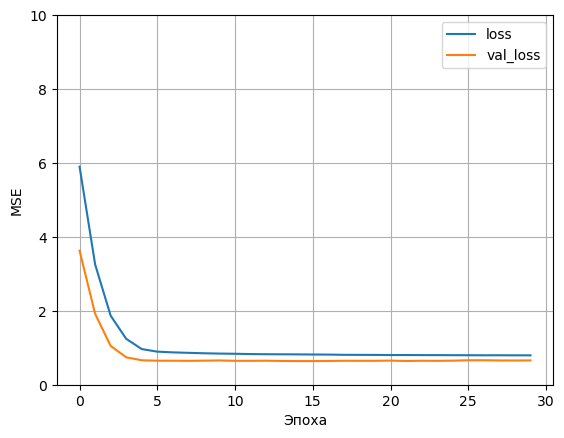

In [14]:
plot_loss(history)
plt.show()

In [15]:
y_pred1 = model1.predict(X_test)

9/9 [==============================] - 0s 5ms/step


In [16]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense (Dense)               (None, 10)                130       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 276
Trainable params: 251
Non-trainable params: 25
_________________________________________________________________


0.8308754309024416 0.7416081355209991 -0.005472285050785786 0.32300725900601907


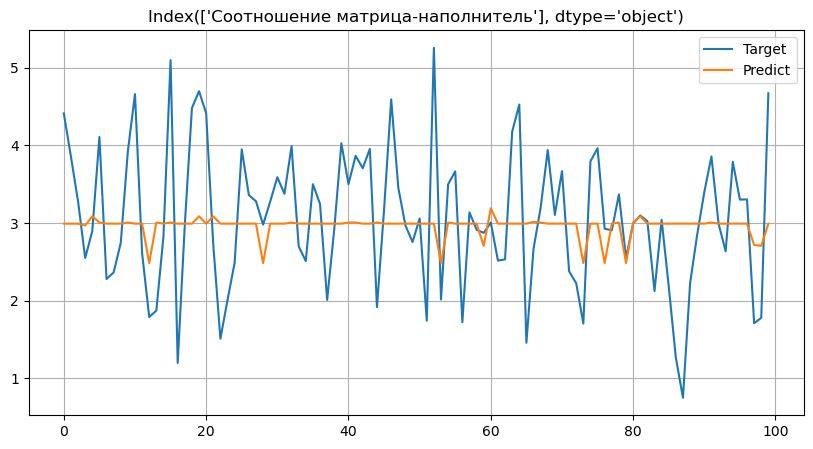

In [17]:
me(y_test, y_pred1, 'model1')
result(y_test, y_pred1)

изменим число нейронов в скрытых слоях

In [18]:
def nn_model2(normalizer):
    model2 = Sequential([
        normalizer,
        layers.Dense(32, activation = 'tanh'),
        layers.Dense(32, activation = 'tanh'),
        layers.Dense(1, activation = 'linear')
    ])
    
    model2.compile(loss='mean_squared_error', optimizer='Adam')
    return model2

In [19]:
model2 = nn_model2(normalizer)
history = model2.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=30)

In [20]:
y_pred2 = model2.predict(X_test)

9/9 [==============================] - 0s 4ms/step


0.8383819268264401 0.7433409780996144 -0.014556166134174653 0.3230381646302184


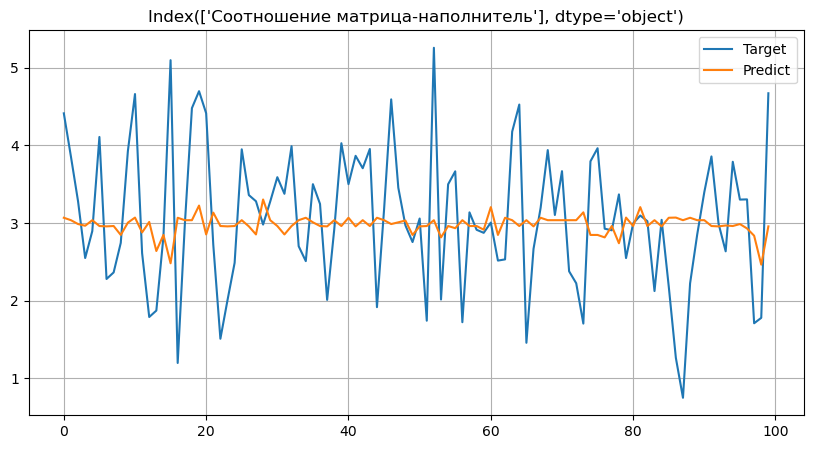

In [21]:
me(y_test, y_pred2, 'model2')
result(y_test, y_pred2)

In [22]:
def nn_model3(normalizer):
    model3 = Sequential([
        normalizer,
        layers.Dense(8, activation = 'tanh'),
        layers.Dense(8, activation = 'tanh'),
        layers.Dense(1, activation = 'linear')
    ])
    
    model3.compile(loss='mean_squared_error', optimizer='Adam')
    return model3

In [23]:
model3 = nn_model3(normalizer)
history = model3.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=30)

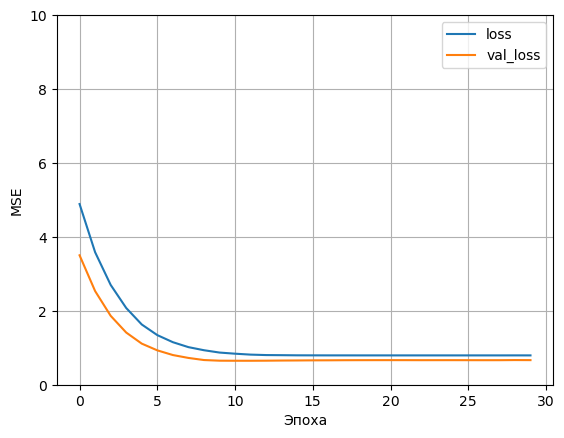

In [24]:
plot_loss(history)
plt.show()

9/9 [==============================] - 0s 3ms/step
0.8226961712860149 0.736151469315849 0.004425731608125094 0.3197603480400129


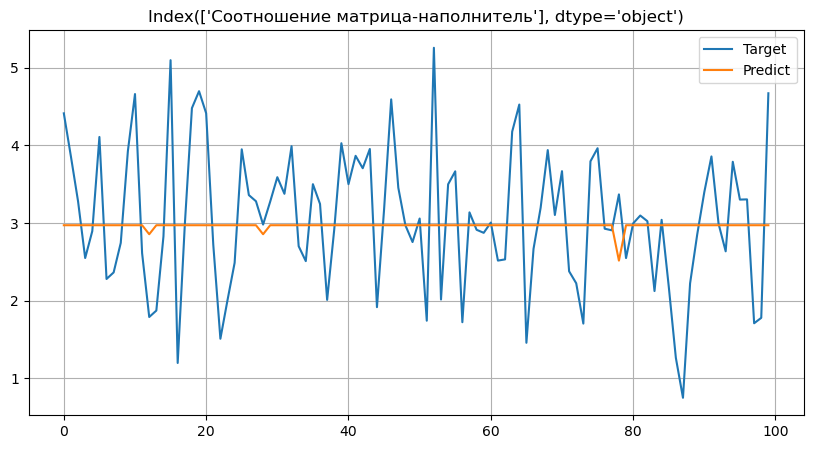

In [47]:
y_pred3 = model3.predict(X_test)
me(y_test, y_pred3, 'model3')
result(y_test, y_pred3)

Изменим функции активации

In [48]:
def nn_model4(normalizer):
    model4 = Sequential([
        normalizer,
        layers.Dense(8, activation = 'softmax'),
        layers.Dense(8, activation = 'softmax'),
        layers.Dense(1, activation = 'relu')
    ])
    
    model4.compile(loss='mean_squared_error', optimizer='Adam')
    return model4

9/9 [==============================] - 0s 4ms/step
2.9512479640700837 1.4842403220073965 -2.5714114581075482 0.4659679081011582


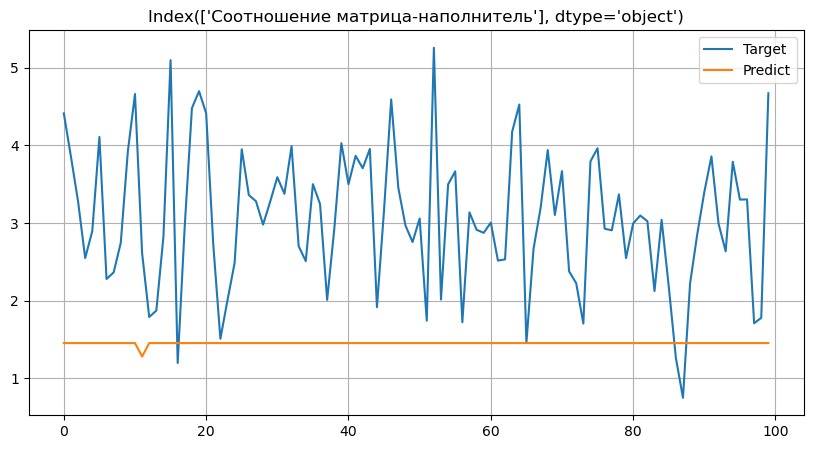

In [49]:
model4 = nn_model4(normalizer)
history = model4.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=30)
y_pred4 = model4.predict(X_test)
me(y_test, y_pred4, 'model4')
result(y_test, y_pred4)

In [50]:
def nn_model5(normalizer):
    model5 = Sequential([
        normalizer,
        layers.Dense(8, activation = 'tanh'),
        layers.Dense(8, activation = 'softmax'),
        layers.Dense(1, activation = 'relu')
    ])
    
    model5.compile(loss='mean_squared_error', optimizer='Adam')
    return model5

9/9 [==============================] - 0s 4ms/step
9.301567986474069 2.911222182670401 -10.256162440327897 1.0


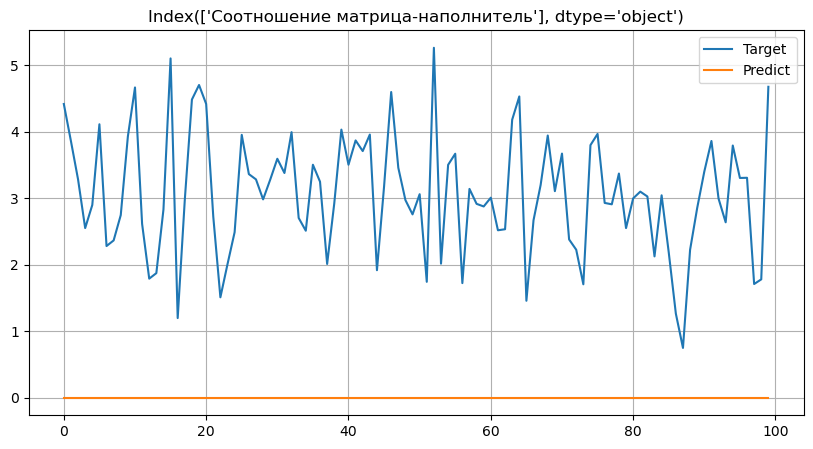

In [51]:
model5 = nn_model5(normalizer)
history = model5.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=30)
y_pred5 = model5.predict(X_test)
me(y_test, y_pred5, 'model5')
result(y_test, y_pred5)

изменим число слоев

In [52]:
def nn_model7(normalizer):
    model7 = Sequential([
        normalizer,
        layers.Dense(10, activation = 'tanh'),
        layers.Dense(10, activation = 'tanh'),
        layers.Dropout(0.01),
        layers.Dense(10, activation = 'tanh'),
        layers.Dense(1, activation = 'linear')
    ])
    
    model7.compile(loss='mean_squared_error', optimizer='Adam')
    return model7

9/9 [==============================] - 0s 6ms/step
0.8321878840622242 0.7358341744640998 -0.007060531890815014 0.32056287851185566


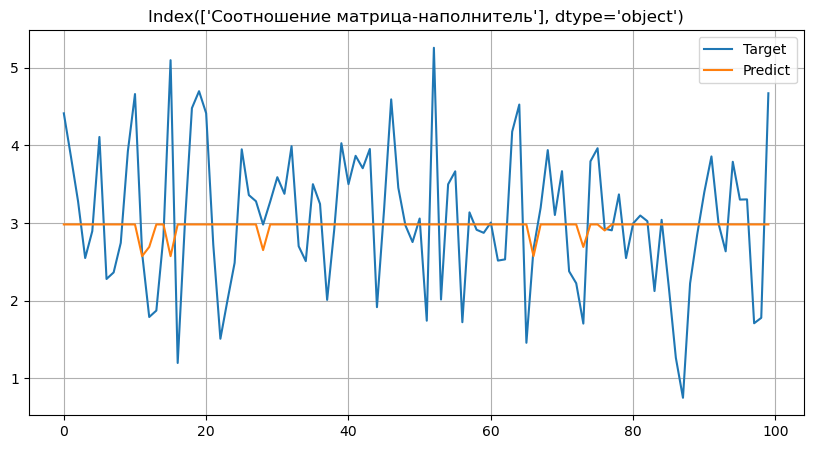

In [53]:
model7 = nn_model7(normalizer)
history = model7.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=30)
y_pred7 = model7.predict(X_test)
me(y_test, y_pred7, 'model7')
result(y_test, y_pred7)

изменим оптимайзер

In [54]:
def nn_model9(normalizer):
    model9 = Sequential([
        normalizer,
        layers.Dense(8, activation = 'tanh'),
        layers.Dense(8, activation = 'tanh'),
        layers.Dense(1, activation = 'linear')
    ])
    
    model9.compile(loss='mean_squared_error', optimizer='RMSprop')
    return model9

9/9 [==============================] - 0s 2ms/step
0.8643984729610273 0.7451037438258655 -0.0460397256644649 0.31402618334666554


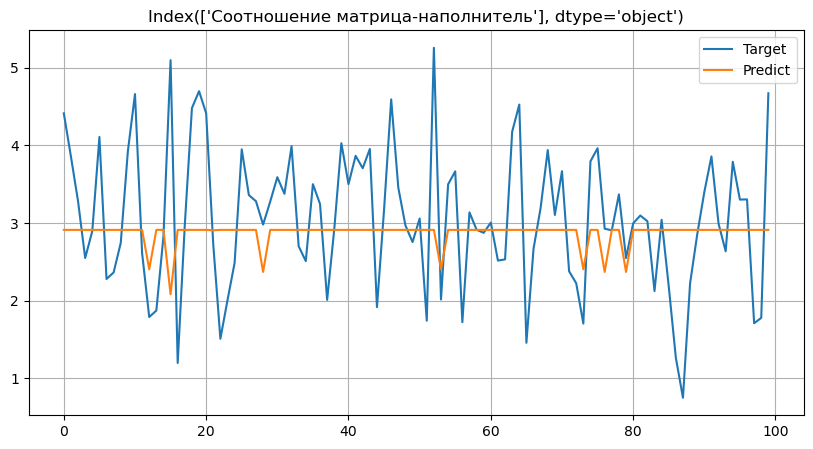

In [55]:
model9 = nn_model9(normalizer)
history = model9.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=30)
y_pred9 = model9.predict(X_test)
me(y_test, y_pred9, 'model9')
result(y_test, y_pred9)

уберем нормалайзер

In [56]:
def nn_model10():
    model10 = Sequential([
        layers.Dense(14),
        layers.Dense(8, activation = 'tanh'),
        layers.Dense(8, activation = 'tanh'),
        layers.Dense(1, activation = 'linear')
    ])
    
    model10.compile(loss='mean_squared_error', optimizer='Adam')
    return model10

9/9 [==============================] - 0s 2ms/step
0.8420719550967025 0.7455882105309848 -0.019021602249878367 0.3230370907891397


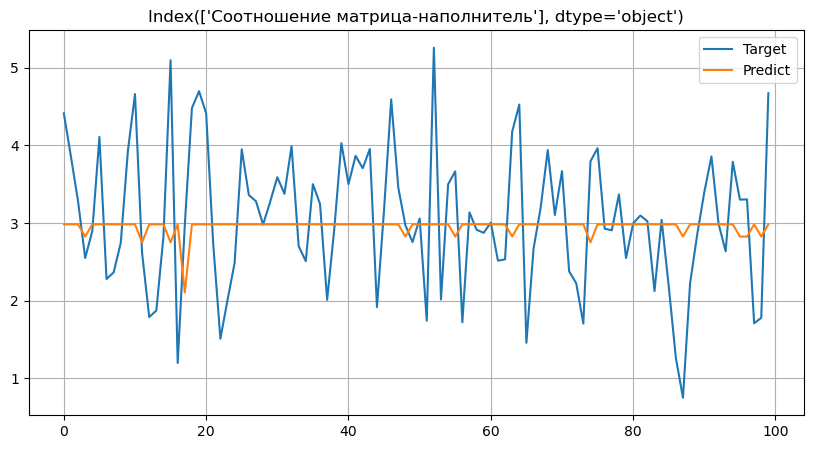

In [57]:
model10 = nn_model10()
history = model10.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=30)
y_pred10 = model10.predict(X_test)
me(y_test, y_pred10, 'model10')
result(y_test, y_pred10)

изменим число эпох обучения

9/9 [==============================] - 0s 4ms/step
0.8493062366632815 0.7516660030787472 -0.027776066934853683 0.3272638825001866


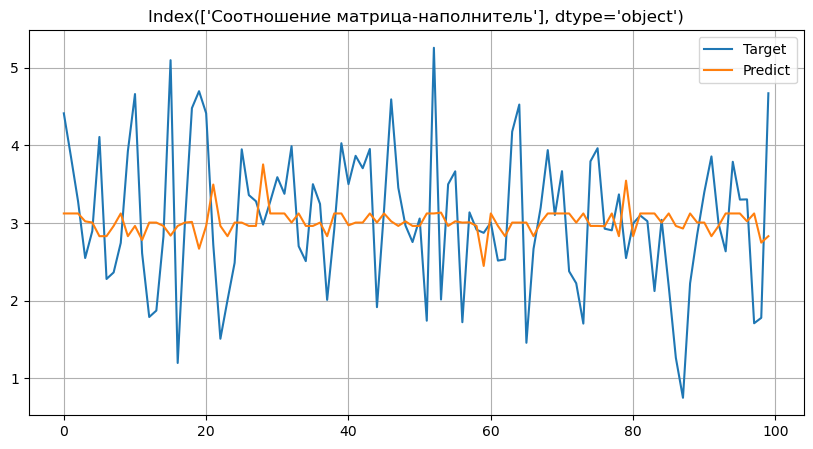

In [58]:
model8 = nn_model2(normalizer)
history = model2.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=100)
y_pred8 = model2.predict(X_test)
me(y_test, y_pred8, 'model8')
result(y_test, y_pred8)

добавим слой дропаут

In [59]:
def nn_model6(normalizer):
    model6 = Sequential([
        normalizer,
        layers.Dense(8, activation = 'tanh'),
        layers.Dropout(0.1),
        layers.Dense(8, activation = 'tanh'),
        layers.Dense(1, activation = 'linear')
    ])
    
    model6.compile(loss='mean_squared_error', optimizer='Adam')
    return model6

9/9 [==============================] - 0s 4ms/step
0.8365462042410061 0.743878859484768 -0.012334692115270274 0.32794773316046716


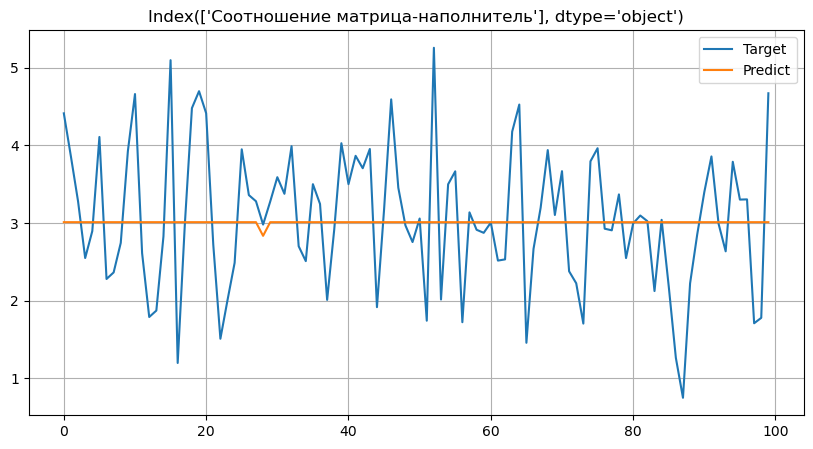

In [60]:
model6 = nn_model6(normalizer)
history = model6.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=100)
y_pred6 = model6.predict(X_test)
me(y_test, y_pred6, 'model6')
result(y_test, y_pred6)

9/9 [==============================] - 0s 4ms/step
0.8365462042410061 0.743878859484768 -0.012334692115270274 0.32794773316046716


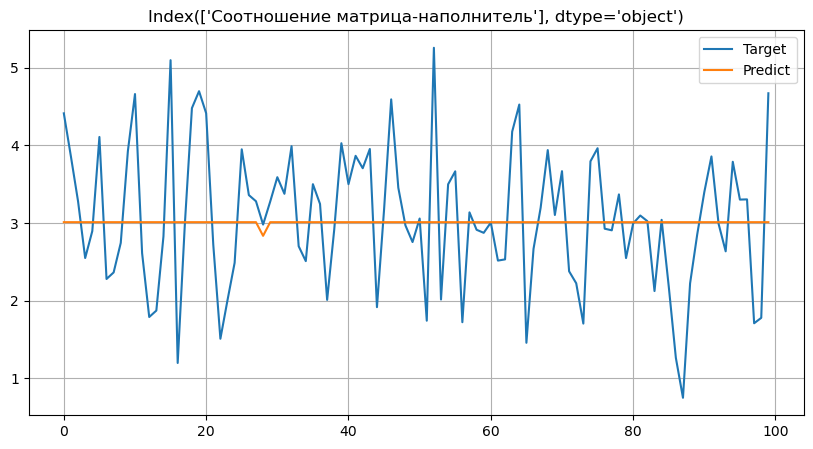

In [61]:
model11 = nn_model3(normalizer)
history = model11.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=120)
y_pred11 = model6.predict(X_test)
me(y_test, y_pred11, 'model11')
result(y_test, y_pred11)

In [62]:
df_metrics = pd.DataFrame(m, index=m_col).T.sort_values(by='r2_score')

In [63]:
df_metrics

,mean_squared_error,mean_absolute_error,r2_score,mean_absolute_percentage_error
model5,9.301568,2.911222,-10.256162,1.000000
model4,2.951248,1.484240,-2.571411,0.465968
model9,0.864398,0.745104,-0.046040,0.314026
model8,0.849306,0.751666,-0.027776,0.327264
model10,0.842072,0.745588,-0.019022,0.323037
model2,0.838382,0.743341,-0.014556,0.323038
model6,0.836546,0.743879,-0.012335,0.327948
model11,0.836546,0.743879,-0.012335,0.327948
model7,0.832188,0.735834,-0.007061,0.320563
model1,0.830875,0.741608,-0.005472,0.323007


# # Сохраняем модель с лучшим результатом

In [64]:
model3.save('bestNN3')

INFO:tensorflow:Assets written to: bestNN3\assets


INFO:tensorflow:Assets written to: bestNN3\assets


In [65]:
import pydot
import graphviz
from keras.utils.vis_utils import plot_model

In [66]:
plot_model(model3, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [67]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 210
Trainable params: 185
Non-trainable params: 25
_________________________________________________________________
